# COVID-19 Mini ETL Pipeline
**Project Type**: Data Engineering (ETL)

This project demonstrates a simple Extract-Transform-Load (ETL) pipeline using COVID-19 data for Malaysia.
- **Extract** data from a CSV file
- **Transform** it by cleaning and aggregating
- **Load** the cleaned data into a new CSV file
- Optionally, **visualize** the data using `matplotlib` and `seaborn`


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Extract the data

In [4]:
# Load the dataset
# Download from: https://covid.ourworldindata.org/data/owid-covid-data.csv
df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


## Transform

In [26]:
# For this project filter for Malaysia only
df_my = df[df['location'] == 'Malaysia']

# Select the relevant columns
df_my = df_my[['date', 'new_cases', 'total_cases', 'new_deaths', 'total_deaths']]

# Convert date to datetime
df_my['date'] = pd.to_datetime(df_my['date'])

# Handle missing values
df_my.fillna(0, inplace=True)

# Add 7-day rolling average
df_my['new_cases_avg7'] = df_my['new_cases'].rolling(window=7).mean()
df_my.head()

,date,new_cases,total_cases,new_deaths,total_deaths,new_cases_avg7
228618,2020-01-05,0.0,0.0,0.0,0.0,NaN
228619,2020-01-06,0.0,0.0,0.0,0.0,NaN
228620,2020-01-07,0.0,0.0,0.0,0.0,NaN
228621,2020-01-08,0.0,0.0,0.0,0.0,NaN
228622,2020-01-09,0.0,0.0,0.0,0.0,NaN


## Load the transformed data

In [10]:
# Save the cleaned dataset
df_my.to_csv('malaysia_covid_clean.csv', index=False)

## Visualize

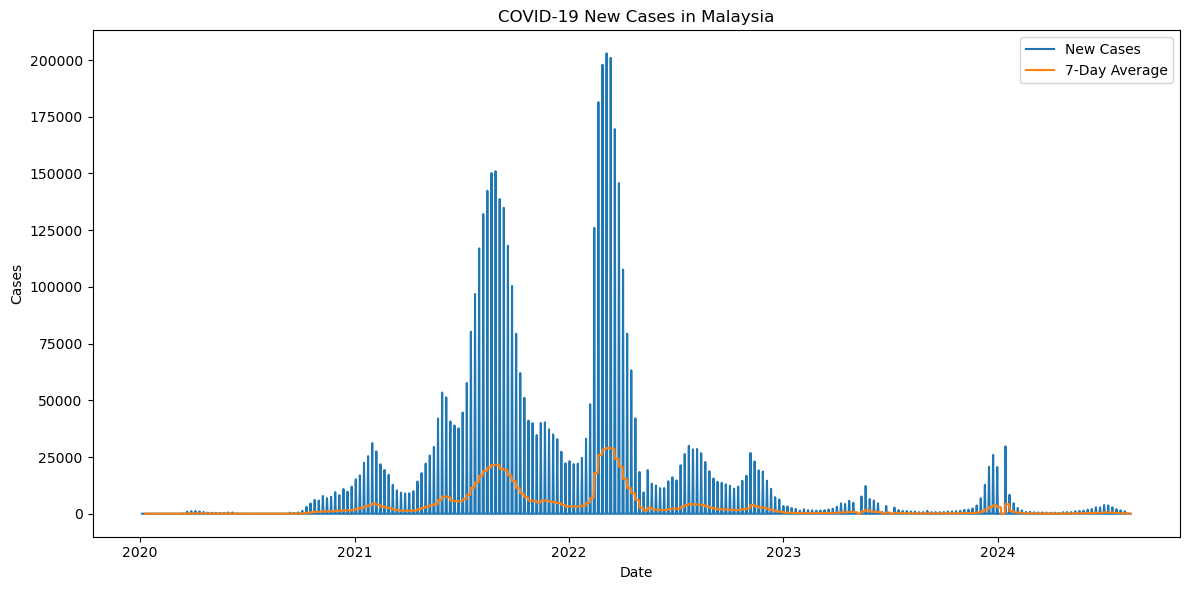

In [13]:
# Plot new cases and 7-day average
plt.figure(figsize=(12,6))
sns.lineplot(data=df_my, x='date', y='new_cases', label='New Cases')
sns.lineplot(data=df_my, x='date', y='new_cases_avg7', label='7-Day Average')
plt.title('COVID-19 New Cases in Malaysia')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic statistics
print("Basic Description:")
display(df_my.describe())

# Check for missing values
print("\n Missing Values:")
display(df_my.isnull().sum())

Basic Description:


,date,new_cases,total_cases,new_deaths,total_deaths,new_cases_avg7
count,1684,1684.000000,1.684000e+03,1684.000000,1684.000000,1678.000000
mean,2022-04-25 12:00:00.000000256,3152.856295,2.982536e+06,22.179929,23000.232779,3164.129917
min,2020-01-05 00:00:00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2021-02-28 18:00:00,0.000000,2.642690e+05,0.000000,958.000000,136.857143
50%,2022-04-25 12:00:00,0.000000,4.325818e+06,0.000000,35292.000000,970.857143
75%,2023-06-20 06:00:00,0.000000,5.105016e+06,0.000000,37118.500000,3282.892857
max,2024-08-14 00:00:00,202971.000000,5.309410e+06,2732.000000,37351.000000,28995.857143
std,NaN,16742.213510,2.236060e+06,161.970730,16650.289053,5620.914519



 Missing Values:


date              0
new_cases         0
total_cases       0
new_deaths        0
total_deaths      0
new_cases_avg7    6
dtype: int64

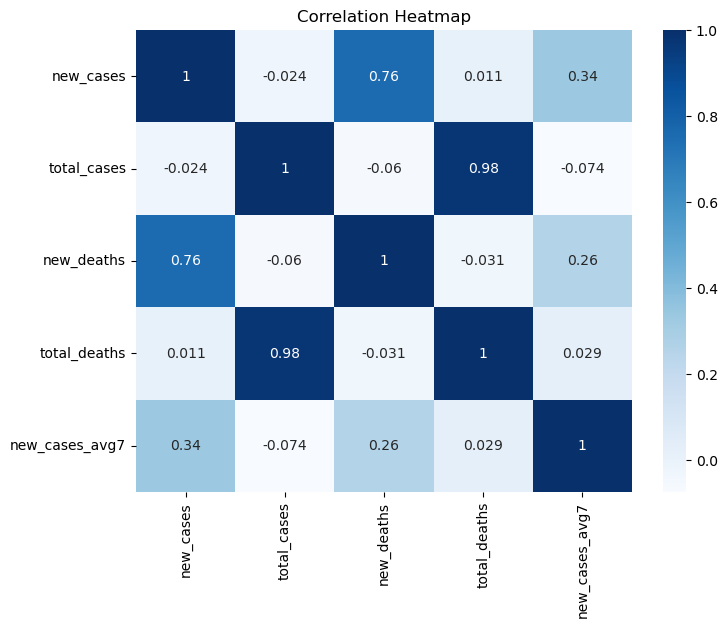

In [20]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_my.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

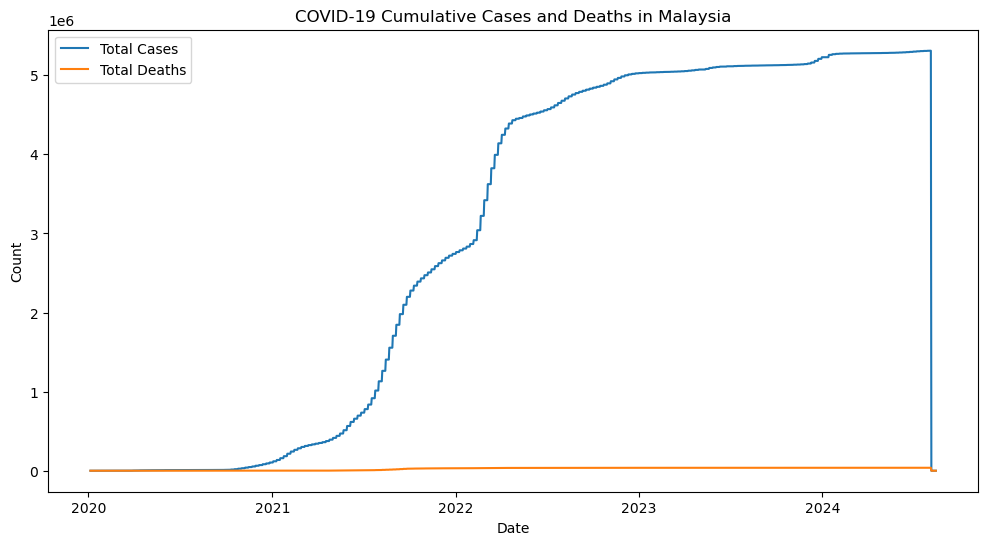

In [22]:
# Lineplot: Total cases vs Total deaths
plt.figure(figsize=(12,6))
sns.lineplot(data=df_my, x='date', y='total_cases', label='Total Cases')
sns.lineplot(data=df_my, x='date', y='total_deaths', label='Total Deaths')
plt.title('COVID-19 Cumulative Cases and Deaths in Malaysia')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend()
plt.show()

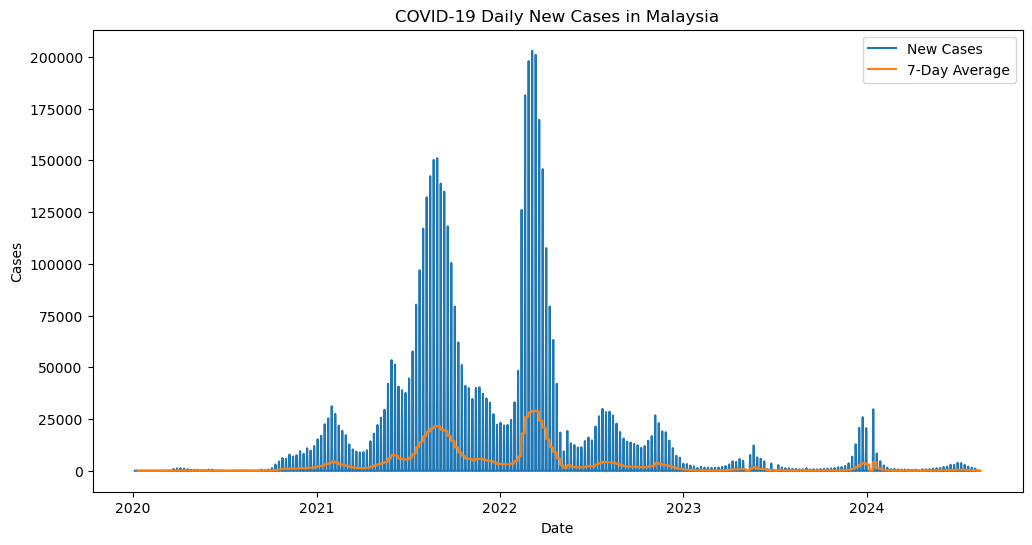

In [24]:
# Lineplot: Daily new cases and 7-day avg
plt.figure(figsize=(12,6))
sns.lineplot(data=df_my, x='date', y='new_cases', label='New Cases')
sns.lineplot(data=df_my, x='date', y='new_cases_avg7', label='7-Day Average')
plt.title('COVID-19 Daily New Cases in Malaysia')
plt.ylabel('Cases')
plt.xlabel('Date')
plt.legend()
plt.show()
